In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [215]:
q001 = 17
s001 = q001 / (2*np.pi)
tth_001 = 2*np.arcsin(q001 * wavelength / (4 * np.pi)) * 180 / np.pi
wavelength = 0.1
sdd = 300

In [216]:
gamma = np.arange(0,1,0.01)
gamma_rads = np.radians(gamma)
alpha = []

In [217]:
for g in gamma_rads:
    def func(x):
        return wavelength**2*q001**2 / (4*np.pi**2) / (1 + np.cos(x[0] - 2*g)) + np.cos(x[0]) - 1
    alpha.append(fsolve(func, 0.2))

In [221]:
h = sdd * np.tan(alpha)
pix = sdd * np.tan(alpha) / 0.172

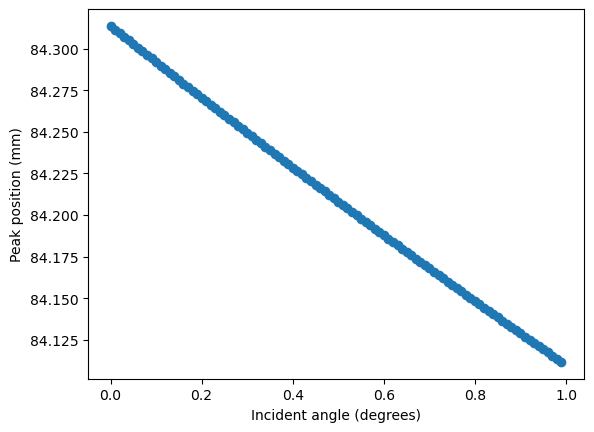

In [222]:
plt.scatter(np.array(gamma), h)
plt.xlabel("Incident angle (degrees)")
plt.ylabel("Peak position (mm)")
plt.show()

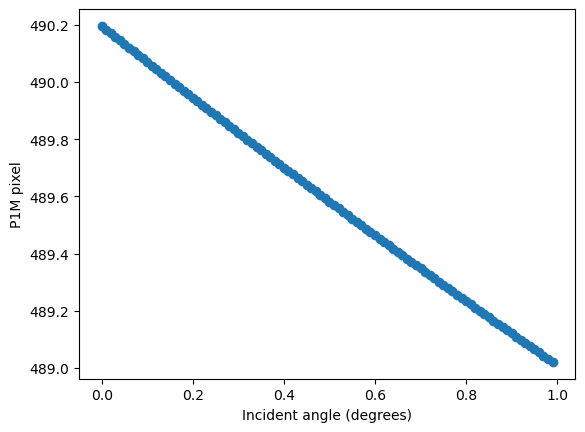

In [223]:
plt.scatter(np.array(gamma), pix)
plt.xlabel("Incident angle (degrees)")
plt.ylabel("P1M pixel")
plt.show()

In [36]:
from pygix.grazing_geometry import GrazingGeometry
from pyFAI.detectors import Pilatus1M
import matplotlib.pyplot as plt
import numpy as np

In [23]:
p1m = Pilatus1M()

In [30]:
geo = GrazingGeometry(detector=p1m)
geo.set_poni1(0.1)
geo.set_poni2(0.1)
geo.set_wavelength(1e-10)
geo.set_dist(0.3)

In [34]:
geo.get_shape()

(1043, 981)

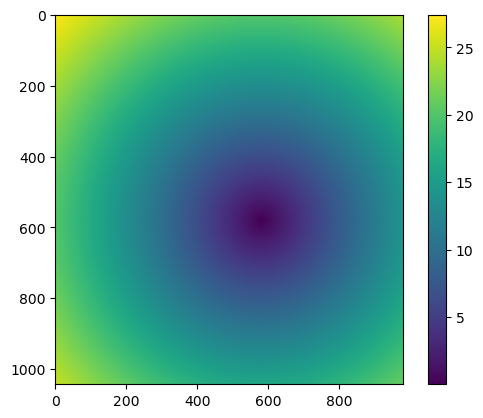

In [33]:
plt.imshow(chi)
plt.colorbar()

In [91]:
shape = geo.get_shape()
d2,d1 = np.meshgrid(
    np.linspace(1,shape[1],shape[1]),
    np.linspace(1,shape[0],shape[0]),
)

In [92]:
geo.set_incident_angle(0.0)
geo.set_tilt_angle(0.0)
geo.set_sample_orientation(3)
qx, qy, qz = geo.calc_q_xyz(d1=d1,d2=d2)
qx=qx*100
qy=qy*100
qz=qz*100

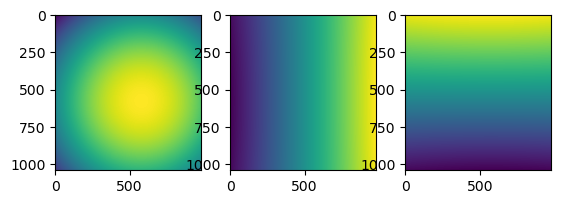

In [93]:
fig, ax = plt.subplots(ncols=3, nrows=1)
ax[0].imshow(qx)
ax[1].imshow(qy)
ax[2].imshow(qz)

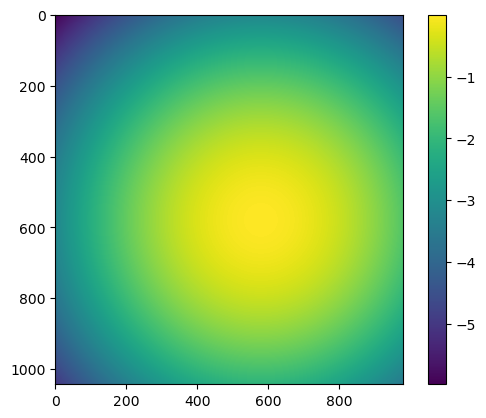

In [108]:
geo.set_incident_angle(0.0)
geo.set_tilt_angle(0.0)
geo.set_sample_orientation(3)
qx, qy, qz = geo.calc_q_xyz(d1=d1,d2=d2)
qx=qx*100
qy=qy*100
qz=qz*100
plt.imshow(qx)
plt.colorbar()

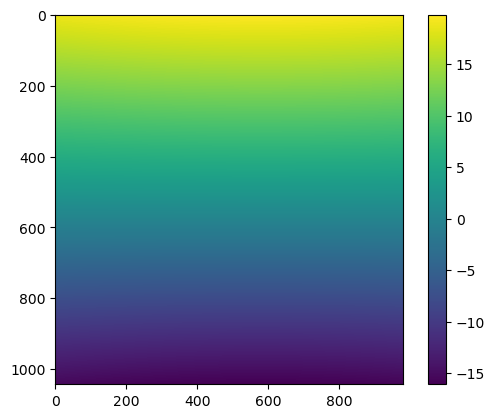

In [115]:
geo.set_incident_angle(0.0)
geo.set_tilt_angle(0.0)
geo.set_sample_orientation(3)
qx, qy, qz = geo.calc_q_xyz(d1=d1,d2=d2)
qx=qx*100
qy=qy*100
qz=qz*100
v_slice_0 = qz[:,0]
plt.imshow(qz)
plt.colorbar()

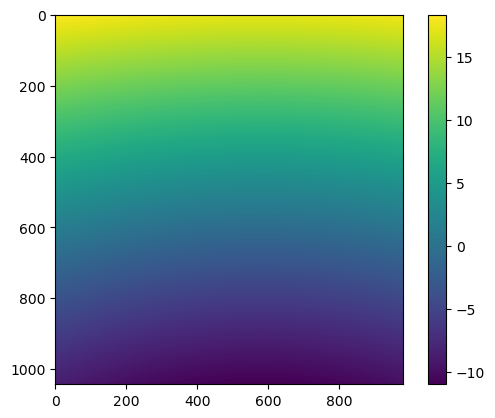

In [116]:
geo.set_incident_angle(40.0)
geo.set_tilt_angle(0.0)
geo.set_sample_orientation(3)
qx, qy, qz = geo.calc_q_xyz(d1=d1,d2=d2)
qx=qx*100
qy=qy*100
qz=qz*100
v_slice_1 = qz[:,0]
plt.imshow(qz)
plt.colorbar()

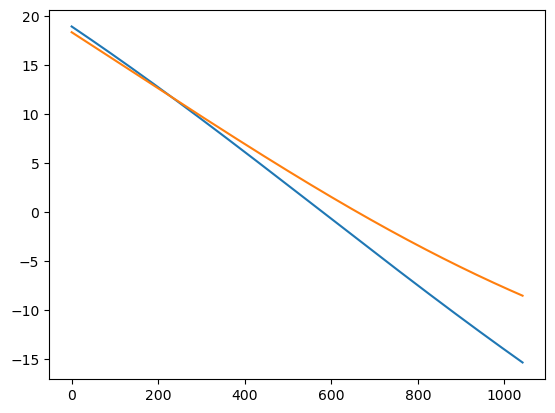

In [117]:
plt.plot(np.arange(v_slice_0.size), v_slice_0)
plt.plot(np.arange(v_slice_0.size), v_slice_1)

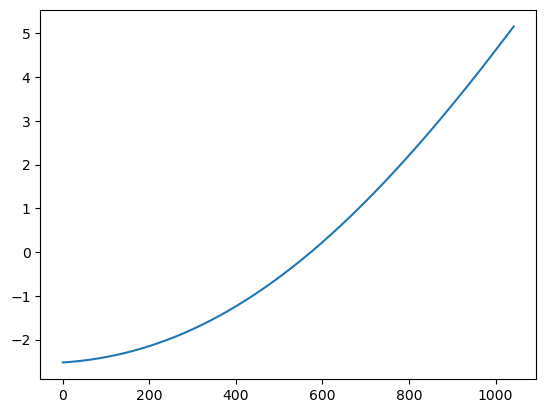

In [136]:
pos = 490
geo.set_incident_angle(0.0)
qx, qy, qz = geo.calc_q_xyz(d1=d1,d2=d2)
qz=qz*100
v_slice_0 = qz[:,pos]

geo.set_incident_angle(40.0)
qx, qy, qz = geo.calc_q_xyz(d1=d1,d2=d2)
qz=qz*100
v_slice_1 = qz[:,pos]

v_sub = v_slice_1 - v_slice_0
plt.plot(np.arange(v_slice_0.size), v_sub)